In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [2]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [4]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")


In [5]:
# Display dataset info
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
# Display dataset info
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4998 non-null   object
 1   sentiment  4998 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
None


In [7]:
# Detect Correct Column Names
print("\n🔹 Column Names:", df.columns)


🔹 Column Names: Index(['review', 'sentiment'], dtype='object')


In [8]:
df['sentiment'].value_counts()

sentiment
positive    2499
negative    2499
Name: count, dtype: int64

In [9]:
# Convert labels to binary (positive = 1, negative = 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [10]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [11]:
# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & Stopwords removal
    return ' '.join(words)


In [12]:
# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)


In [13]:
# Print Preprocessed Data
print("\n🔹 Sample of Cleaned Text Data:")
print(df[['review']].head())



🔹 Sample of Cleaned Text Data:
                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...


In [14]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_review'])
y = df['sentiment']


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train SVM Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [17]:
# Predictions
y_pred = svm_model.predict(X_test)


In [18]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8800
F1 Score: 0.8755

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       524
           1       0.86      0.89      0.88       476

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



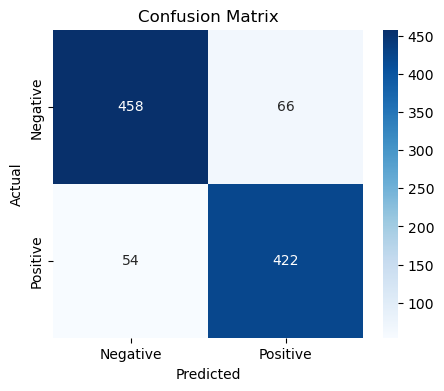

In [19]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

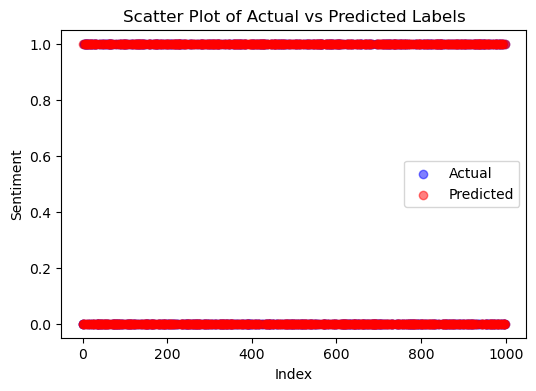

In [20]:
# Scatter Plot of Predictions
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label="Actual", alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predicted", alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Sentiment")
plt.title("Scatter Plot of Actual vs Predicted Labels")
plt.legend()
plt.show()

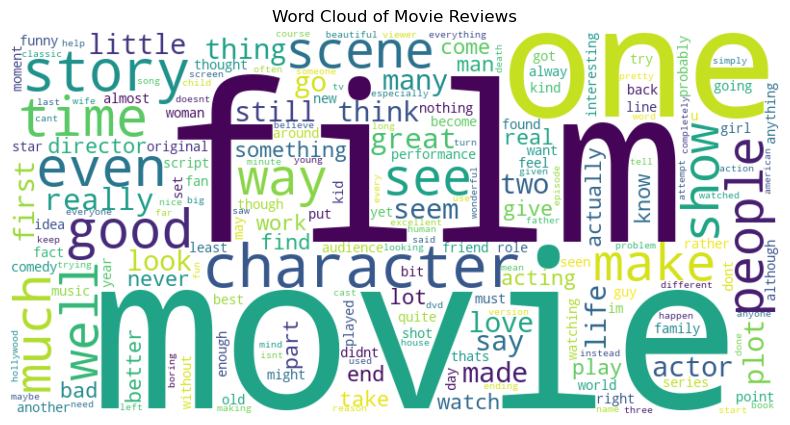

In [23]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df['processed_review']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Reviews")
plt.show()

In [24]:
# Function to predict sentiment of new reviews
def predict_sentiment(review_text):
    processed_text = preprocess_text(review_text)  # Preprocess input text
    text_tfidf = vectorizer.transform([processed_text])  # Convert to TF-IDF
    prediction = svm_model.predict(text_tfidf)[0]  # Predict sentiment
    return "Positive" if prediction == 1 else "Negative"


In [25]:
# Example Predictions
sample_reviews = [
    "This movie was absolutely fantastic! The story was engaging and the acting was superb.",
    "I hated this movie. It was a complete waste of time, with terrible acting and a boring plot.",
    "An average film, some good moments but overall quite forgettable.",
    "Amazing cinematography, but the storyline was weak and predictable.",
    "I loved every second of it! Highly recommend to everyone."
]

In [26]:
# Predict Sentiment
for review in sample_reviews:
    print(f"Review: {review}\nPredicted Sentiment: {predict_sentiment(review)}\n")

Review: This movie was absolutely fantastic! The story was engaging and the acting was superb.
Predicted Sentiment: Positive

Review: I hated this movie. It was a complete waste of time, with terrible acting and a boring plot.
Predicted Sentiment: Negative

Review: An average film, some good moments but overall quite forgettable.
Predicted Sentiment: Positive

Review: Amazing cinematography, but the storyline was weak and predictable.
Predicted Sentiment: Negative

Review: I loved every second of it! Highly recommend to everyone.
Predicted Sentiment: Positive

